In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('master_df.csv')
master_df = df[(df['category'] == 'opm')].reset_index()

In [130]:
master_df['genres'] = master_df['genres'].apply(lambda x: x.replace("'", ''))
master_df['genres'] = master_df['genres'].apply(lambda x: x.replace("[", ''))
master_df['genres'] = master_df['genres'].apply(lambda x: x.replace("]", ''))
master_df['genres'] = master_df['genres'].apply(lambda x: x.replace(" ", ''))
master_df['genres'] = master_df['genres'].apply(lambda x: x.split(','))

In [131]:
master_df['genres']

0                                         [opm, pinoyrock]
1                                         [opm, pinoyrock]
2        [opm, pinoyindie, pinoyreggae, pinoyrock, popr...
3                                                    [opm]
4        [opm, pinoyindie, pinoyreggae, pinoyrock, popr...
                               ...                        
92737                                                [opm]
92738                       [opm, pinoyhiphop, tagalograp]
92739                                  [opm, pinoypoppunk]
92740                       [opm, pinoyhiphop, tagalograp]
92741                                                [opm]
Name: genres, Length: 92742, dtype: object

In [132]:
index = 0
lst = []
for item in master_df['genres']:
    lst.extend(map(lambda x: [index, x], item))
    index += 1
lst[:10]

[[0, 'opm'],
 [0, 'pinoyrock'],
 [1, 'opm'],
 [1, 'pinoyrock'],
 [2, 'opm'],
 [2, 'pinoyindie'],
 [2, 'pinoyreggae'],
 [2, 'pinoyrock'],
 [2, 'poprock'],
 [3, 'opm']]

In [133]:
genres = pd.DataFrame(lst, columns=['index', 'genres'])
genres

,index,genres
0,0,opm
1,0,pinoyrock
2,1,opm
3,1,pinoyrock
4,2,opm
...,...,...
190418,92739,pinoypoppunk
190419,92740,opm
190420,92740,pinoyhiphop
190421,92740,tagalograp


In [134]:
df_genres = pd.merge(master_df.drop('genres', axis = 1), genres, left_index = True, right_on = 'index')
len(df_genres)

190423

In [135]:
ax = df_genres[df_genres['year'] == 2017].groupby('genres')[['streams']].sum().sort_values(by = 'streams', ascending = False)
ax = ax.rename(columns = {'streams':'streams_2017'})
ax

,streams_2017
genres,
opm,566249541
pinoyrock,165854477
pinoyreggae,53150151
poprock,48896042
dancepop,38476642
pinoyindie,26512380
,19249751
pinoyr&b,12030419
deepneofolk,8758629


In [136]:
bx = df_genres[df_genres['year'] == 2018].groupby('genres')[['streams']].sum().sort_values(by = 'streams', ascending = False)
bx = bx.rename(columns = {'streams':'streams_2018'})
bx

,streams_2018
genres,
opm,1102698876
pinoyrock,266125733
pinoyindie,168074461
pinoytrap,136432680
pinoypoppunk,99651325
pinoyhiphop,96020549
tagalograp,95977500
pinoyr&b,93724208
pinoyreggae,83470321


In [137]:
cx = df_genres[df_genres['year'] == 2019].groupby('genres')[['streams']].sum().sort_values(by = 'streams', ascending = False)
cx = cx.rename(columns = {'streams':'streams_2019'})
cx

,streams_2019
genres,
opm,1648357801
pinoyrock,332835508
pinoypoppunk,248816533
pinoyhiphop,240996493
pinoyindie,238162486
pinoyr&b,204813588
tagalograp,160430352
pinoyreggae,79418054
pinoytrap,70367916


In [138]:
dx = df_genres[df_genres['year'] == 2020].groupby('genres')[['streams']].sum().sort_values(by = 'streams', ascending = False)
dx = dx.rename(columns = {'streams':'streams_2020'})
dx

,streams_2020
genres,
opm,1359253745
pinoyhiphop,286563983
tagalograp,275040149
pinoyrock,173060038
pinoyindie,119026540
pinoyr&b,96079849
pinoypoppunk,82026826
pinoyreggae,75173712
poprock,62147965


In [139]:
df_1 = pd.merge(ax, bx, how = 'outer', on = 'genres')
df_1

,streams_2017,streams_2018
genres,,
opm,566249541.0,1.102699e+09
pinoyrock,165854477.0,2.661257e+08
pinoyreggae,53150151.0,8.347032e+07
poprock,48896042.0,6.635504e+07
dancepop,38476642.0,2.934262e+07
pinoyindie,26512380.0,1.680745e+08
,19249751.0,1.667969e+07
pinoyr&b,12030419.0,9.372421e+07
deepneofolk,8758629.0,NaN


In [140]:
df_2 = pd.merge(cx, dx, how = 'outer', on = 'genres')
df_2

,streams_2019,streams_2020
genres,,
opm,1.648358e+09,1.359254e+09
pinoyrock,3.328355e+08,1.730600e+08
pinoypoppunk,2.488165e+08,8.202683e+07
pinoyhiphop,2.409965e+08,2.865640e+08
pinoyindie,2.381625e+08,1.190265e+08
pinoyr&b,2.048136e+08,9.607985e+07
tagalograp,1.604304e+08,2.750401e+08
pinoyreggae,7.941805e+07,7.517371e+07
pinoytrap,7.036792e+07,3.330035e+07


In [141]:
df_final = pd.merge(df_1, df_2, how = 'outer', on = 'genres')
df_final = df_final
df_final = df_final.fillna(0)
df_final

,streams_2017,streams_2018,streams_2019,streams_2020
genres,,,,
opm,566249541.0,1.102699e+09,1.648358e+09,1.359254e+09
pinoyrock,165854477.0,2.661257e+08,3.328355e+08,1.730600e+08
pinoyreggae,53150151.0,8.347032e+07,7.941805e+07,7.517371e+07
poprock,48896042.0,6.635504e+07,5.513084e+07,6.214796e+07
dancepop,38476642.0,2.934262e+07,4.178111e+07,5.243710e+07
pinoyindie,26512380.0,1.680745e+08,2.381625e+08,1.190265e+08
,19249751.0,1.667969e+07,2.094628e+06,0.000000e+00
pinoyr&b,12030419.0,9.372421e+07,2.048136e+08,9.607985e+07
deepneofolk,8758629.0,0.000000e+00,0.000000e+00,0.000000e+00


In [142]:
# graphing line chart
yr_ = [2017, 2018, 2019, 2020]

Text(0, 0.5, 'OPM')

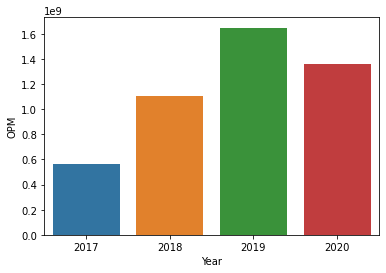

In [143]:
# opm
sns.barplot(x = yr_, y = df_final.iloc[0])
plt.xlabel('Year')
plt.ylabel('OPM')

Text(0, 0.5, 'PinoyRock')

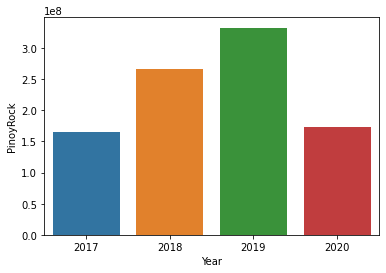

In [144]:
sns.barplot(x = yr_, y = df_final.iloc[1])
plt.xlabel('Year')
plt.ylabel('PinoyRock')

Text(0, 0.5, 'PinoyReggae')

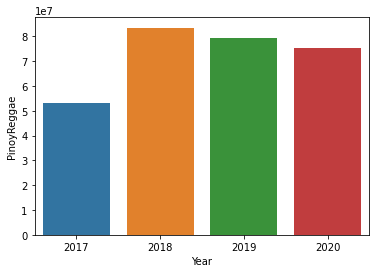

In [145]:
sns.barplot(x = yr_, y = df_final.iloc[2])
plt.xlabel('Year')
plt.ylabel('PinoyReggae')

Text(0, 0.5, 'PopRock')

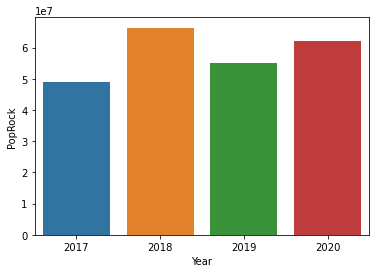

In [146]:
sns.barplot(x = yr_, y = df_final.iloc[3])
plt.xlabel('Year')
plt.ylabel('PopRock')

Text(0, 0.5, 'DancePop')

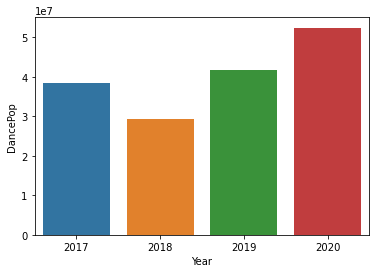

In [147]:
sns.barplot(x = yr_, y = df_final.iloc[4])
plt.xlabel('Year')
plt.ylabel('DancePop')

Text(0, 0.5, 'PinoyIndie')

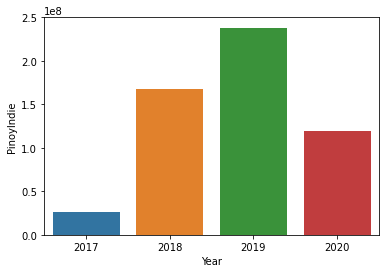

In [148]:
sns.barplot(x = yr_, y = df_final.iloc[5])
plt.xlabel('Year')
plt.ylabel('PinoyIndie')

Text(0, 0.5, '')

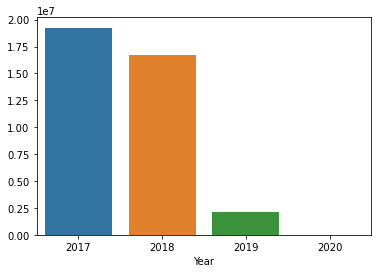

In [149]:
sns.barplot(x = yr_, y = df_final.iloc[6])
plt.xlabel('Year')
plt.ylabel('')

Text(0, 0.5, 'PinoyR&B')

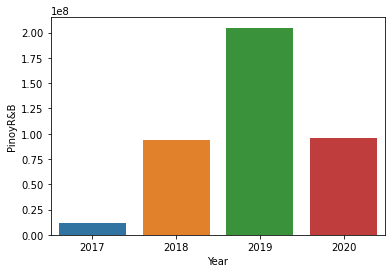

In [150]:
sns.barplot(x = yr_, y = df_final.iloc[7])
plt.xlabel('Year')
plt.ylabel('PinoyR&B')

Text(0, 0.5, 'DeepNeoFolk')

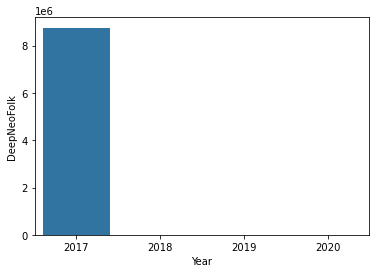

In [151]:
sns.barplot(x = yr_, y = df_final.iloc[8])
plt.xlabel('Year')
plt.ylabel('DeepNeoFolk')

Text(0, 0.5, 'ViralPop')

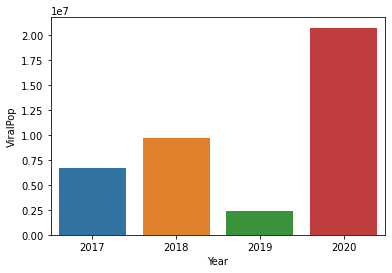

In [152]:
sns.barplot(x = yr_, y = df_final.iloc[9])
plt.xlabel('Year')
plt.ylabel('ViralPop')

Text(0, 0.5, 'PinoyHipHop')

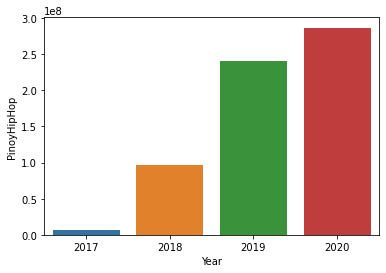

In [153]:
sns.barplot(x = yr_, y = df_final.iloc[10])
plt.xlabel('Year')
plt.ylabel('PinoyHipHop')

Text(0, 0.5, 'TagalogRap')

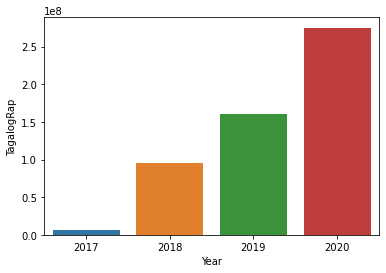

In [154]:
sns.barplot(x = yr_, y = df_final.iloc[11])
plt.xlabel('Year')
plt.ylabel('TagalogRap')

Text(0, 0.5, 'NeoMellow')

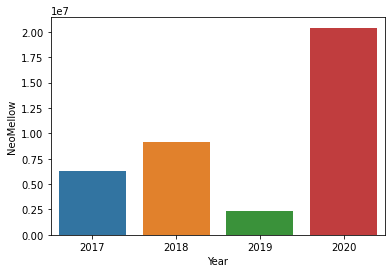

In [155]:
sns.barplot(x = yr_, y = df_final.iloc[12])
plt.xlabel('Year')
plt.ylabel('NeoMellow')

Text(0, 0.5, 'AcousticPop')

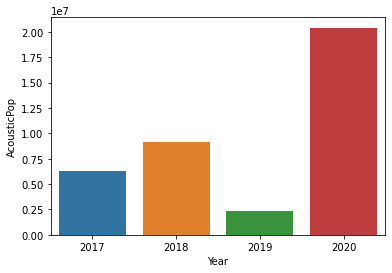

In [156]:
sns.barplot(x = yr_, y = df_final.iloc[13])
plt.xlabel('Year')
plt.ylabel('AcousticPop')

Text(0, 0.5, 'PinoyTrap')

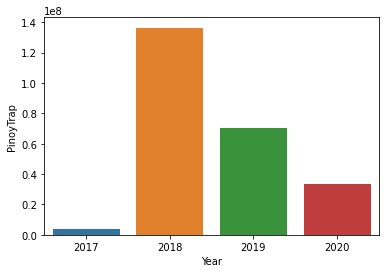

In [157]:
sns.barplot(x = yr_, y = df_final.iloc[14])
plt.xlabel('Year')
plt.ylabel('PinoyTrap')

Text(0, 0.5, 'Papuri')

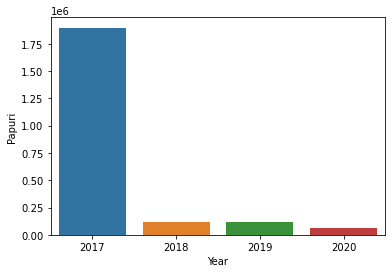

In [158]:
sns.barplot(x = yr_, y = df_final.iloc[15])
plt.xlabel('Year')
plt.ylabel('Papuri')

Text(0, 0.5, 'ClassicOpm')

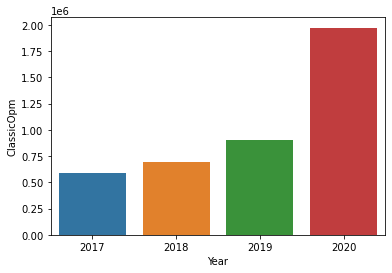

In [159]:
sns.barplot(x = yr_, y = df_final.iloc[16])
plt.xlabel('Year')
plt.ylabel('ClassicOpm')

Text(0, 0.5, 'PinoyPopPunk')

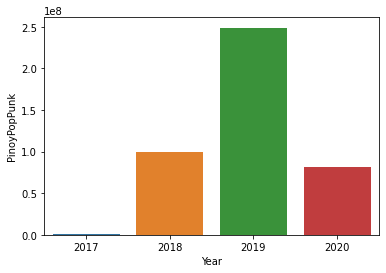

In [160]:
sns.barplot(x = yr_, y = df_final.iloc[17])
plt.xlabel('Year')
plt.ylabel('PinoyPopPunk')

Text(0, 0.5, 'PostTeenPop')

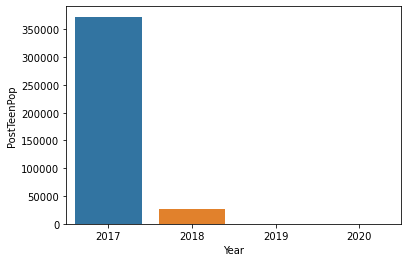

In [161]:
sns.barplot(x = yr_, y = df_final.iloc[18])
plt.xlabel('Year')
plt.ylabel('PostTeenPop')

Text(0, 0.5, 'AcousticOpm')

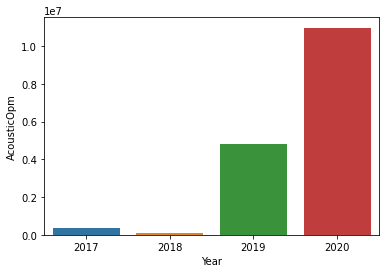

In [162]:
sns.barplot(x = yr_, y = df_final.iloc[19])
plt.xlabel('Year')
plt.ylabel('AcousticOpm')

Text(0, 0.5, 'PinoyAlternativeRap')

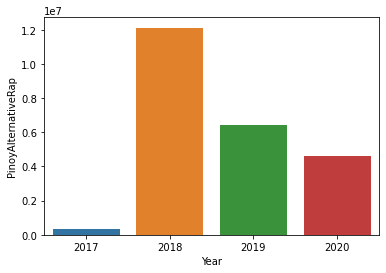

In [163]:
sns.barplot(x = yr_, y = df_final.iloc[20])
plt.xlabel('Year')
plt.ylabel('PinoyAlternativeRap')

Text(0, 0.5, 'PinoySinger SongWriter')

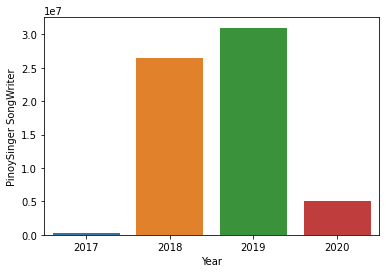

In [164]:
sns.barplot(x = yr_, y = df_final.iloc[21])
plt.xlabel('Year')
plt.ylabel('PinoySinger SongWriter')

Text(0, 0.5, 'PinoyPraise')

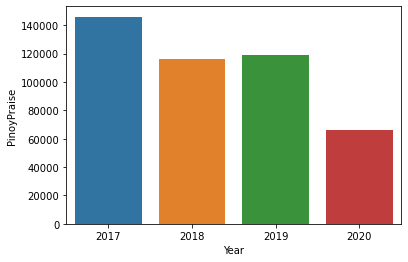

In [165]:
sns.barplot(x = yr_, y = df_final.iloc[22])
plt.xlabel('Year')
plt.ylabel('PinoyPraise')

Text(0, 0.5, 'SoftRock')

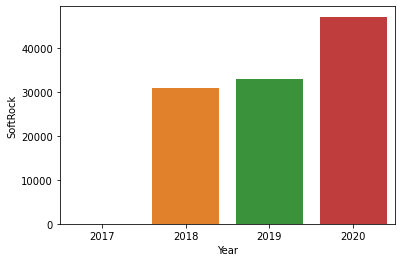

In [166]:
sns.barplot(x = yr_, y = df_final.iloc[23])
plt.xlabel('Year')
plt.ylabel('SoftRock')

Text(0, 0.5, 'ManilaSound')

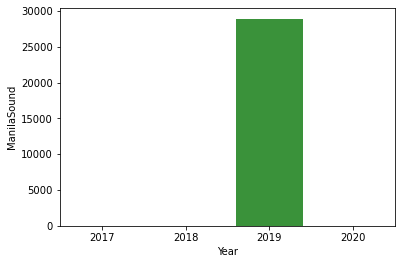

In [167]:
sns.barplot(x = yr_, y = df_final.iloc[24])
plt.xlabel('Year')
plt.ylabel('ManilaSound')

Text(0, 0.5, 'PinoyMetal')

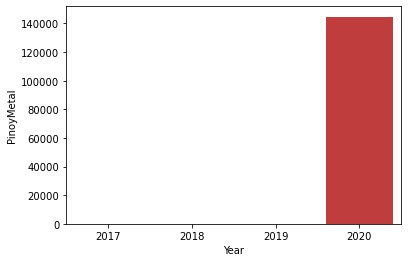

In [168]:
sns.barplot(x = yr_, y = df_final.iloc[25])
plt.xlabel('Year')
plt.ylabel('PinoyMetal')